# Extending R

We have seen how functionality can be encapsulated in functions that abstract away details. A collection of functions (and associated data, if any) can be grouped together into a ```library``` called a **package**

The use of packages can extend the functionality of R

![package.png](images/package.png)
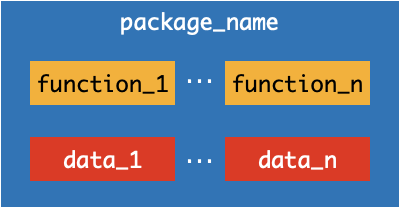

We can list the packages that are currently loaded into our environment by using the ```.packages``` function and printing it out

In [ ]:
print(.packages())

For example, we will look at the ```paste``` function from the built-in ```base``` package. To look for documentation about a function, we prepend the function name with ```?```

In [ ]:
?paste

Let us see how paste can be used to generate a string output by joining/concatenating values together

In [ ]:
# Create variables for a patient

pt_name <- "Alice"
pt_age <- "10"
pt_symptom <- "wheezing"
pt_symptom_duration <- 2
pt_symptom_duration_unit <- "day(s)"

In [ ]:
# Print a string that incorporates the variables

paste(pt_name, "is a", pt_age, "year-old patient who presented with", pt_symptom, "for", pt_symptom_duration, pt_symptom_duration_unit)

## Loading a library package into current environment

- We can use the ```library``` function to list packages that have been installed

In [ ]:
library()

![package_import.png](images/package_import.png)

To use a library, it must be loaded into the working environment (namespace) so that the functions can be recognized and run
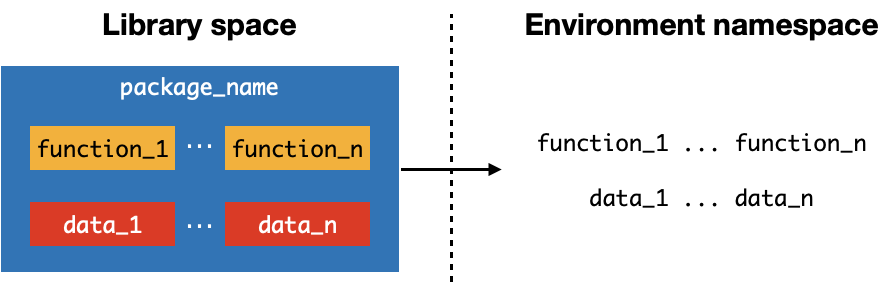

As an example, we will load another library called ```glue``` that offers a different way of generating a string output from different variables

- To load it we specify the name when calling the ```library``` function

In [ ]:
library(glue)

In [ ]:
# Check if it is loaded into environment

print(.packages())

Once a package is loaded, we can find information about its usage using the ```help``` function and specifying the ```package``` name

In [ ]:
help(package="glue")

We can find help for the `glue` function inside the `glue` library

In [ ]:
?glue # see documentation about function

We can now use the ```glue``` function to generate the string output

In [ ]:
# Create variables for a patient

pt_name <- "Alice"
pt_NRIC <- "S1041233J"
pt_age <- "10"
pt_symptom <- "wheezing"
pt_symptom_duration <- 2
pt_symptom_duration_unit <- "day(s)"

Instead of joining them in sequence, we can use the ```{``` ```}``` brackets to indicate where a variable should be substituted when generating a string

In [ ]:
glue("{pt_name} ({pt_NRIC}) is a {pt_age}-year-old patient who presented with {pt_symptom} for {pt_symptom_duration} {pt_symptom_duration_unit}")

## Unloading a library from the current environment

If we want to remove a library from our environment, we use the ```detach``` function and specify `"package:<PACKAGE NAME>"`

In [ ]:
detach("package:glue")

In [ ]:
glue

## Using a library function without loading it

Occasionally we would like to use just a specific function from a library, without loading the entire package

![package_reference.png](images/package_reference.png)

- To do this, we can call a function by prepending ```<PACKAGE NAME>::"``` to the function of interest
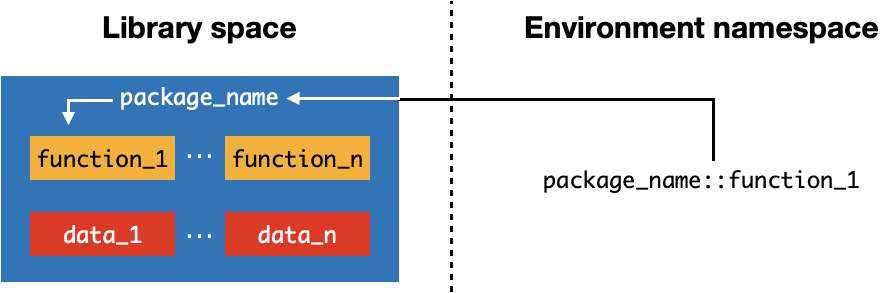

In [ ]:
function_name <- "glue"
package_name <- "glue"

glue::glue("we are using the {function_name} function from the {package_name} package without loading it")

---
## Finding packages from libraries

R has a rich ecosystem with many packages that are organized into repositories.

The main repository is CRAN (Comprehensive R Archive Network): https://cran.r-project.org. You can browse packages
- Alphabetically: https://cran.r-project.org/web/packages/available_packages_by_name.html
- By tasks: https://cran.r-project.org/web/views/

To install a package, we use the ```install.packages``` function and specify the name of package. Note that by default, the repository used is CRAN

In [ ]:
install.packages("secrettext")

In [ ]:
library()

Having installed `secrettext`, we can load it and find out about its functions

In [ ]:
library(secrettext)

In [ ]:
# Documentation about package

help(package="secrettext")

In [ ]:
# Documentation about setcode function

?setcode

In [ ]:
# Documentation about decode function

?decode

We can now use the functions in the `secrettext` library
- `setcode`: encrypt input using key1 and key2
- `decode`: decrypt input using key1 and key2

In [ ]:
# Encrypt NRIC with key1 = 4, key2 = 6

pt_NRIC_encrypt<- setcode(pt_NRIC, key1 = 4, key2 = 6)
pt_NRIC_encrypt

In [ ]:
# Decode but with wrong key1 and key2

decode(pt_NRIC_encrypt, key1 = 24, key2 = 23)

In [ ]:
# Decode with original key1 and key2

decode(pt_NRIC_encrypt, key1 = 4, key2 = 6)

---
## Finding other repositories

CRAN is the default repository. We can confirm this by using the ```getOption``` function and specifying ```"repos"```

In [ ]:
getOption("repos")

To get a list of repositories, we use and internal function ```.get_repositories``` from the ```tools``` library

In [ ]:
tools:::.get_repositories()

### Bioconductor

Bioconductor is another popular repository that provides tools for analysis of biological data: https://www.bioconductor.org/
- List of packages: https://www.bioconductor.org/packages/release/BiocViews.html#___Software

We will install the ```Biostrings``` package that can be used to manipulate genetic sequences

In [ ]:
install.packages("Biostrings")

Our current set-up only has CRAN as its repository. To add more repositories, we use the ```setRepositories``` function with the ```ind``` argument that accepts a vector of indices corresponding to each repository

In [ ]:
setRepositories(ind=c(1:8)) # we include all known repositories

getOption("repos")

Now that we have included the bioconductor repository, we can install the Biostring package and load it. The installation may take some time

In [ ]:
install.packages("Biostrings")

In [ ]:
library(Biostrings)

As an example, we will use the `DNAString` function that creates a new data structure to store DNA sequences

In [ ]:
dna <- DNAString('ATGATAGCTAGCTCGCTACTA')
dna

With this new data structure, we can use functions such as `translate` on DNA sequences

In [ ]:
translate(dna)

---
## Summary

- `print(.packages())` to view packages currently in environment
- `library()` to view installed packages
- `library(`PACKAGE NAME`)` to load package
- `detach("package:`PACKAGE NAME`, unload=TRUE)` to unload package
- `help(package="`PACKAGE NAME`")` to view help for package
- `?`FUNCTION NAME to view help for function in loaded package
- PACKAGE NAME`::`FUNCTION to use a function in a package without loading it
- `install.packages("`PACKAGE NAME`")` to install package
- `tools:::.get_repositories()` to list all available repositories
- `getOption("repos")` to list current repositories
- `setRepositories(ind=c(1:8))` to include all repositories